In [1]:
import gwstools

vel = gwstools.gws_velocities(35.)

print vel['coordinates']


[[0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90

In [2]:
recon_time = 80
seedpoints = '75,25,85,25'
time_min = 0
time_max = 100
time_step = 2
fixplate = 0
movplate = 501

mp = gwstools.gws_motion_path(recon_time,seedpoints,fixplate,movplate,time_min,time_max,time_step)

print mp

ValueError: No JSON object could be decoded

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

recon_time = 70.
cs = gwstools.gws_coastlines(recon_time)

print cs


{u'type': u'FeatureCollection', u'features': [{u'geometry': {u'type': u'Polygon', u'coordinates': [[[-113.21519533386741, -17.352545157881146], [-113.21503485332275, -17.352515347173306], [-113.1507939719969, -17.340569783936374], [-113.02271748432248, -17.316681139198273], [-113.04280742983025, -17.433447598817054], [-113.21519533386741, -17.352545157881146], [-113.21519533386741, -17.352545157881146]]]}, u'type': u'Feature'}, {u'geometry': {u'type': u'Polygon', u'coordinates': [[[-112.56598360272908, 0.7040018554082411], [-112.27099245033929, 0.39795327165482064], [-112.414737734701, 0.20961436973155234], [-112.88975376955891, -0.048908021005154706], [-113.0275083165103, -0.28708508390625553], [-113.26590183521468, -0.13740730656034242], [-113.2706797675706, 0.12476351941612526], [-113.47175477262171, 0.4903475905807731], [-113.27752751207251, 0.7642437719097432], [-113.32617798977171, 1.0499958280190391], [-112.69579335888099, 0.8129663614879804], [-112.56598360272908, 0.70400185540

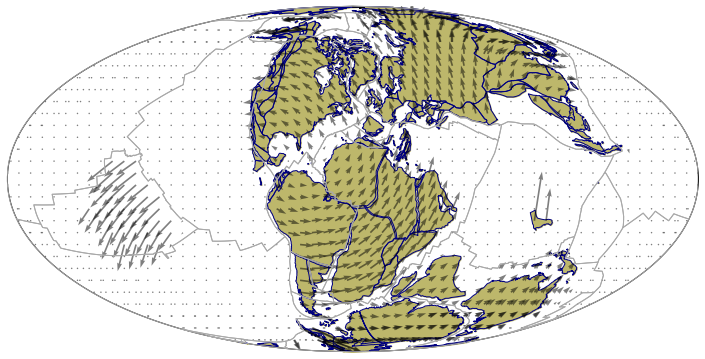

In [3]:
import gwsbasemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

recon_time = 135.

fig = plt.figure(figsize=(12,6))
ax_map = fig.add_axes([0,0,0.8,1.0])
m = Basemap(resolution='c',projection='moll',lon_0=0.,ax=ax_map)
m.drawmapboundary()

gwsbasemap.gws_plot_polygons(gwstools.gws_plate_polygons(recon_time),m,ax_map,color='',edgecolor='darkgray',zorder=2)
gwsbasemap.gws_plot_polygons(gwstools.gws_coastlines(recon_time),m,ax_map,color='darkkhaki')
gwsbasemap.gws_plot_polygons(gwstools.gws_coastlines(recon_time),m,ax_map,color='',edgecolor='navy')

gwsbasemap.gws_plot_vectors(gwstools.gws_velocities(recon_time,velocity_type='east_north'),
                            m,ax_map,scale=2000,alpha=0.5)

plt.show()

